In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

In [8]:
digits = load_digits()
print("Форма изображений:", digits.images.shape)
print("Форма признаков:", digits.data.shape)
print("Количество классов:", len(np.unique(digits.target)))

Форма изображений: (1797, 8, 8)
Форма признаков: (1797, 64)
Количество классов: 10


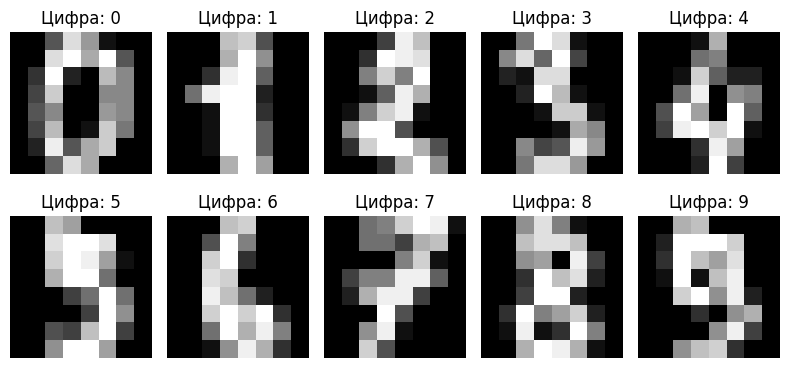

In [16]:
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap="gray")
    plt.title(f"Цифра: {digits.target[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X = digits.data # 64 признака (8x8 пикселей)
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (1437, 64)
Размер тестовой выборки: (360, 64)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [19]:
acc = accuracy_score(y_test, y_pred)
print(f'Точность модели: {acc:.4f}')

#Подробный отчет по классам
print('\nКлассификационный отчет:')
print(classification_report(y_test, y_pred))

Точность модели: 0.9833

Классификационный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.93      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



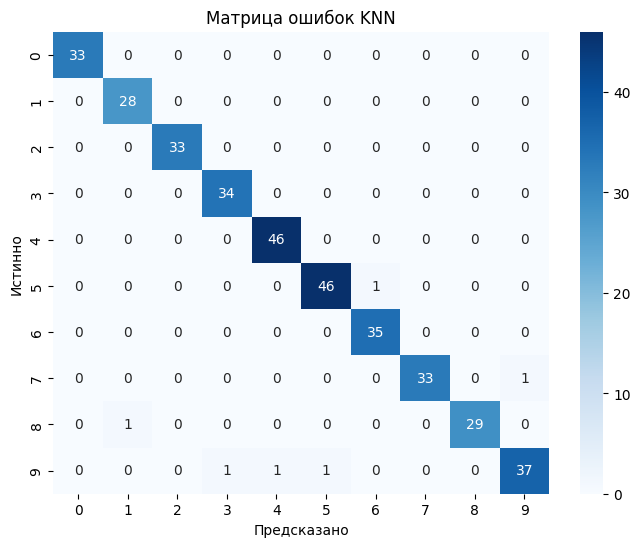

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Предсказано")
plt.ylabel("Истинно")
plt.title("Матрица ошибок KNN")
plt.show()

In [21]:
!pip install pillow

In [36]:
from PIL import Image

img = Image.open("./data/two.png").convert("L")

img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

img_np = np.array(img_resized)

# Инвертируем и масштабируем под стиль sklearn digits
img_np = 16 - (img_np / 255.0 * 16)
img_np = img_np.clip(0, 16)

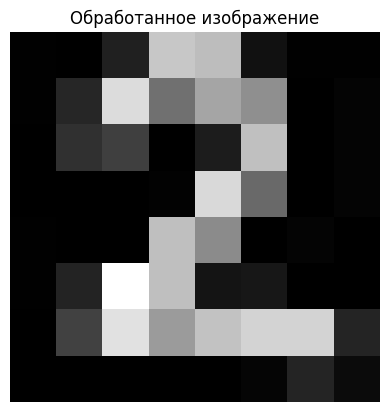

In [37]:
# Визуализируем
plt.imshow(img_np, cmap="gray")
plt.title("Обработанное изображение")
plt.axis("off")
plt.show()

In [38]:
# Расплющим изображение в вектор
img_flat = img_np.flatten().reshape(1, -1)

# Предсказание
prediction = knn.predict(img_flat)
print("Предсказанная цифра:", prediction[0])

Предсказанная цифра: 2
